In [20]:
from prophet import Prophet

In [21]:
import pandas as pd

In [22]:
data = pd.read_csv(r"A:\Work Docs\Data Analyst work\Campus X\00 Datasets For coding\Time Series\Electric_Production.csv")

In [23]:
data

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [25]:
data = data.rename(columns={'DATE':'ds', 'IPG2211A2N': 'y'})

In [26]:
data

,ds,y
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [27]:
data['ds'] = pd.to_datetime(data['ds'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      397 non-null    datetime64[ns]
 1   y       397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [29]:
data

,ds,y
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


(array([ 3652.,  5113.,  6574.,  8035.,  9496., 10957., 12418., 13879.,
        15340., 16801., 18262.]),
 [Text(3652.0, 0, '1980'),
  Text(5113.0, 0, '1984'),
  Text(6574.0, 0, '1988'),
  Text(8035.0, 0, '1992'),
  Text(9496.0, 0, '1996'),
  Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020')])

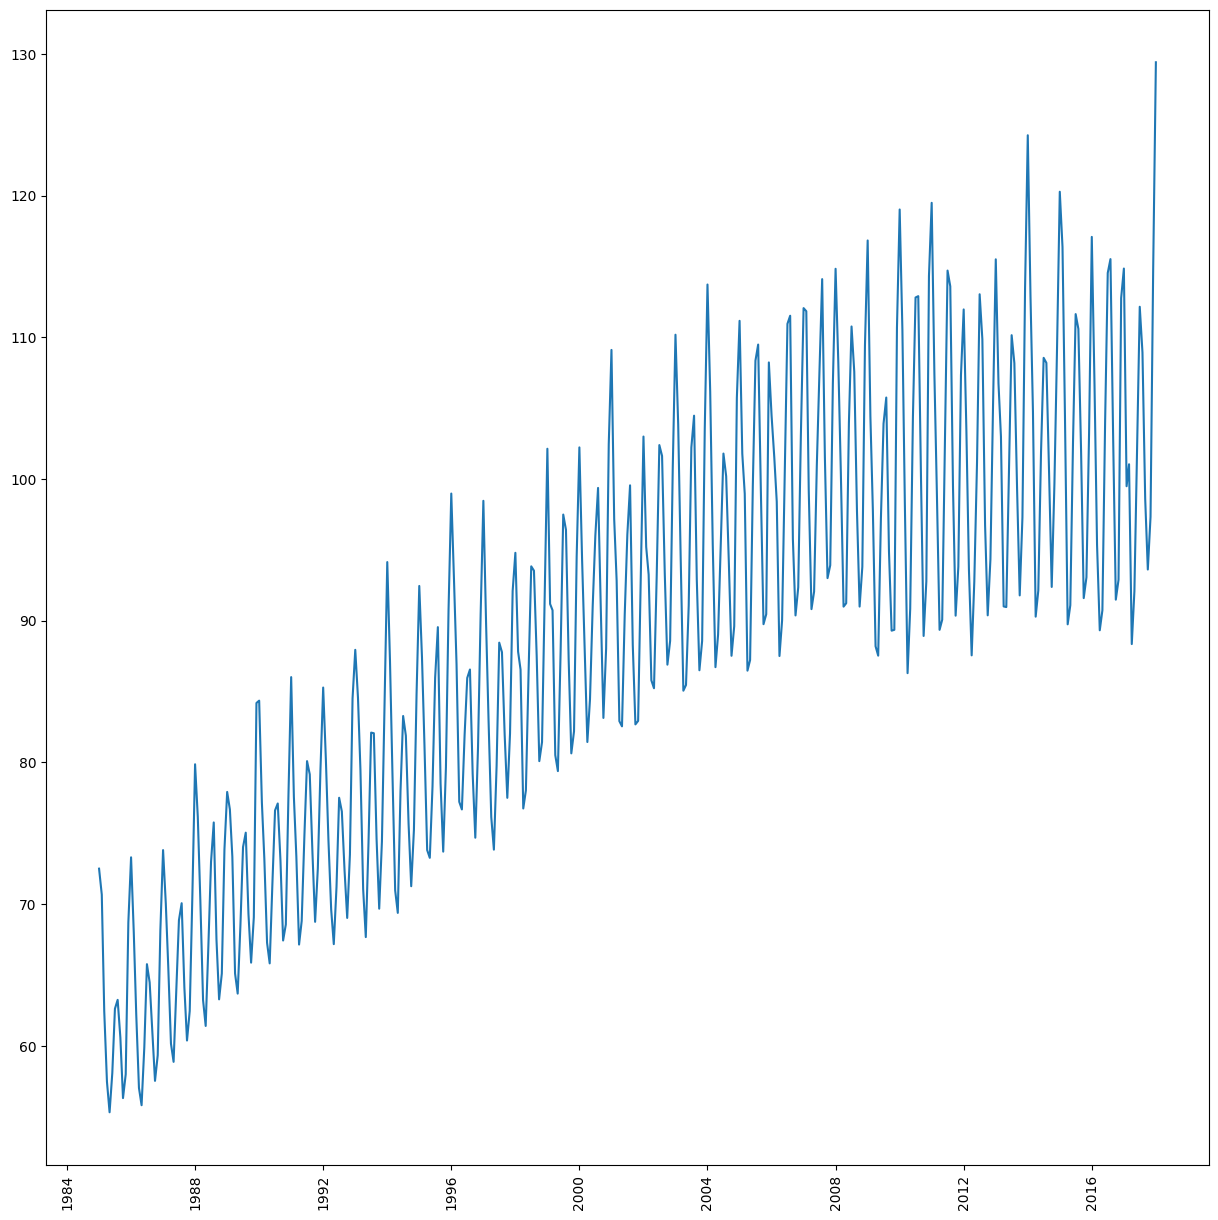

In [30]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,15))
plt.plot(data['ds'],data['y'])
plt.xticks(rotation = 'vertical')

In [36]:
data.tail()

,ds,y
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212
396,2018-01-01,129.4048


In [31]:
m = Prophet()
data.columns = ['ds', 'y']

In [32]:
model = m.fit(data)

13:57:34 - cmdstanpy - INFO - Chain [1] start processing
13:57:35 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# making a dataframe having 1500 days in future after the end date of dataset

future = m.make_future_dataframe(periods=1500, freq= "D")
future

,ds
0,1985-01-01
1,1985-02-01
2,1985-03-01
3,1985-04-01
4,1985-05-01
...,...
1892,2022-02-05
1893,2022-02-06
1894,2022-02-07
1895,2022-02-08


In [39]:
#forecasting data for future dates
forecast = m.predict(future)
forecast.tail(5)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1892,2022-02-05,105.044533,98.255656,105.572305,104.549473,105.531969,-3.209496,-3.209496,-3.209496,-3.209496,-3.209496,-3.209496,0.0,0.0,0.0,101.835037
1893,2022-02-06,105.045321,96.898708,104.146651,104.549806,105.533094,-4.696272,-4.696272,-4.696272,-4.696272,-4.696272,-4.696272,0.0,0.0,0.0,100.349050
1894,2022-02-07,105.046109,95.301950,102.680508,104.550140,105.534219,-5.883311,-5.883311,-5.883311,-5.883311,-5.883311,-5.883311,0.0,0.0,0.0,99.162798
1895,2022-02-08,105.046897,94.751176,101.986177,104.550473,105.535654,-6.759398,-6.759398,-6.759398,-6.759398,-6.759398,-6.759398,0.0,0.0,0.0,98.287499
1896,2022-02-09,105.047685,94.130124,101.444701,104.550806,105.537204,-7.322197,-7.322197,-7.322197,-7.322197,-7.322197,-7.322197,0.0,0.0,0.0,97.725487


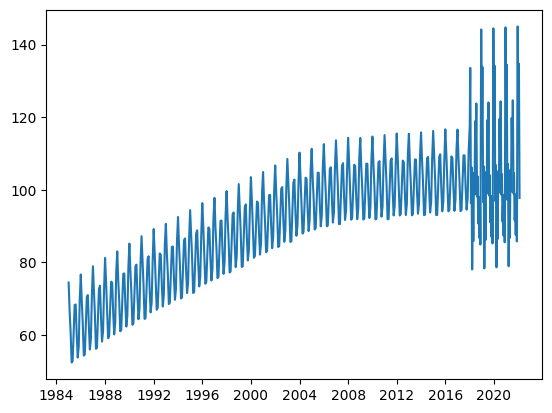

In [40]:
plt.plot(forecast['ds'],forecast['yhat'])

In [41]:
forecast['yhat'].sum()

192567.0079433913

In [42]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [44]:
plot_components_plotly(m, forecast)

In [45]:
from prophet.diagnostics import cross_validation
data_cv = cross_validation(model=m, initial="3650 days", period= '180 days', horizon='365 days')

  0%|          | 0/45 [00:00<?, ?it/s]15:21:09 - cmdstanpy - INFO - Chain [1] start processing
15:21:10 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/45 [00:01<01:01,  1.40s/it]15:21:10 - cmdstanpy - INFO - Chain [1] start processing
15:21:10 - cmdstanpy - INFO - Chain [1] done processing
  4%|▍         | 2/45 [00:01<00:32,  1.32it/s]15:21:10 - cmdstanpy - INFO - Chain [1] start processing
15:21:11 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 3/45 [00:02<00:24,  1.72it/s]15:21:11 - cmdstanpy - INFO - Chain [1] start processing
15:21:11 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 4/45 [00:02<00:25,  1.61it/s]15:21:11 - cmdstanpy - INFO - Chain [1] start processing
15:21:12 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 5/45 [00:03<00:31,  1.27it/s]15:21:13 - cmdstanpy - INFO - Chain [1] start processing
15:21:13 - cmdstanpy - INFO - Chain [1] done processing
 13%|█▎        | 6/45 [00:04<00:29,  1.34it/s]15:21:13

In [46]:
data_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1995-05-01,73.215552,71.358719,75.138315,73.2682,1995-04-27
1,1995-06-01,78.798013,76.922719,80.798145,78.3026,1995-04-27
2,1995-07-01,83.788113,81.829369,85.660345,85.9841,1995-04-27
3,1995-08-01,83.435235,81.536766,85.305754,89.5467,1995-04-27
4,1995-09-01,78.677431,76.788072,80.570604,78.5035,1995-04-27


In [47]:
from prophet.diagnostics import performance_metrics
data_p = performance_metrics(data_cv)

In [48]:
data_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,12.990250,3.604199,2.815551,0.029921,0.027281,0.029462,0.556604
1,38 days,13.013758,3.607459,2.836976,0.030143,0.027715,0.029729,0.553459
2,40 days,13.348108,3.653506,2.887677,0.030923,0.027715,0.030473,0.547170
3,41 days,13.043017,3.611512,2.795666,0.029978,0.027183,0.029540,0.553459
4,42 days,12.861403,3.586280,2.741784,0.029406,0.026322,0.028973,0.559748
...,...,...,...,...,...,...,...,...
265,359 days,11.738620,3.426167,2.766535,0.026762,0.024700,0.026904,0.534591
266,360 days,11.276669,3.358075,2.696200,0.025963,0.022959,0.026099,0.553459
267,361 days,11.198438,3.346407,2.700036,0.026109,0.024700,0.026224,0.553459
268,364 days,11.918481,3.452315,2.767872,0.026855,0.024700,0.026921,0.547170


In [49]:
from prophet.plot import plot_cross_validation_metric

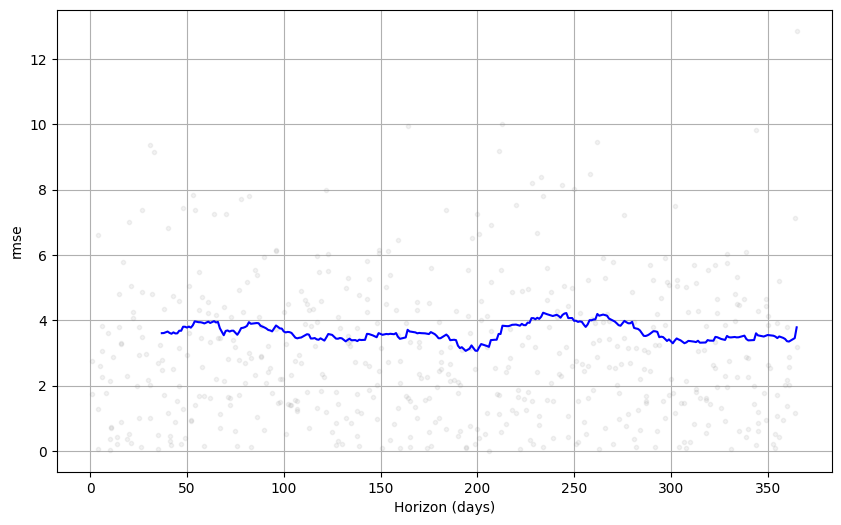

In [50]:
fig = plot_cross_validation_metric(data_cv, metric= 'rmse')